<a href="https://colab.research.google.com/github/karloxkronfeld/Finanzas/blob/main/MovingAvg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
pip install alpha_vantage

     |████████████████████████████████| 1.3MB 6.9MB/s 
     |████████████████████████████████| 296kB 36.0MB/s 
     |████████████████████████████████| 143kB 40.1MB/s 
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3163 sha256=219a4e4f42d59bc6fd9f5dd44503687f11656b8b4456a3568064fe4ad80d0e79
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built idna-ssl


In [113]:
import pandas as pd
from pandas_datareader import data
from alpha_vantage import timeseries, foreignexchange
from pylab import *


SyntaxError: ignored

In [152]:
time=timeseries.TimeSeries(key="000W9HI05KWAWA7B",output_format="pandas")
data=time.get_intraday("EURUSD",interval="1min",outputsize="full")[0].iloc[:,[3]] #columna 3 precio Close
data.columns=["close"]

In [153]:
data["span"]=data.ewm(span=220).mean()

In [154]:
# data["MA200"]=data.iloc[:,1].rolling(220).mean()

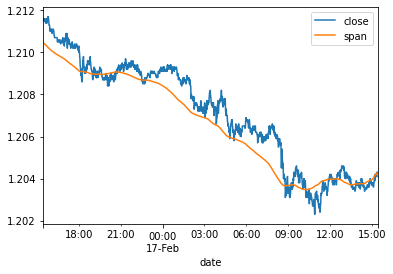

In [155]:
data.plot()

In [159]:
data["signal"]=np.empty_like(data.close)
data["posicion"]=data.close-data.span
data["signal"]=data.posicion.apply(np.sign)

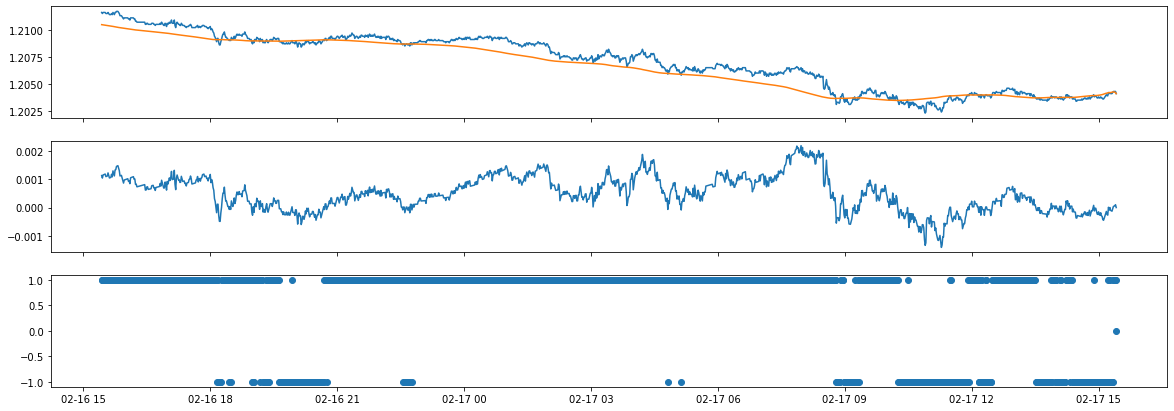

In [199]:
fig, ax = subplots(3,1,True,figsize=(20,7))
ax[0].plot(data.close)
ax[0].plot(data.span)
ax[1].plot(data.posicion)
ax[2].scatter(data.index, data.signal)

In [211]:
diferencia=data.signal.diff()

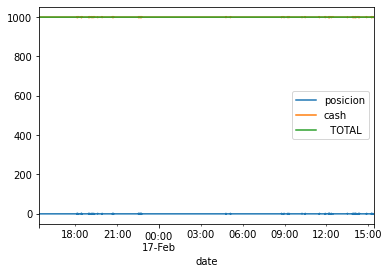

In [220]:
posicion=pd.DataFrame(index=data.index)
posicion["close"]=diferencia.fillna(0)
portafolio=pd.DataFrame(index=data.index)
portafolio["posicion"]=posicion.multiply(data.close,axis=0)
portafolio["cash"]=1000-(posicion.diff().multiply(data.close,axis=0)).cumsum()
portafolio["  TOTAL"]=portafolio.posicion+portafolio.cash
portafolio.plot()